In [2]:
#Primero vamos a importar las librerías.
import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras. optimizers import Adam, RMSprop, SGD
from keras.regularizers import L1, L2, L1L2
import numpy as np


dataset= mnist.load_data()
(x_train, y_train), (x_test,y_test) = dataset #Son las variables separadas de los datos de entrenamiento y pruebas


#Ahora aplanamos las imágenes y convertimos en punto flotante
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_trainv = x_train.astype('float32')
x_testv = x_test.astype('float32')

lr = 0.001  #learning rate
num_clases = 10
y_trainc = keras.utils.to_categorical(y_train, num_clases)
y_testc = keras.utils.to_categorical(y_test, num_clases)
exp2 = Sequential([
    Dense(512, activation='sigmoid', input_shape=(784,)),
    Dense(10,activation='softmax')
      ])
exp2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
history = exp2.fit(x_trainv, y_trainc, batch_size = 10, epochs = 15, verbose=1, validation_data=(x_testv, y_testc))

Epoch 1/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.4698 - accuracy: 0.8735 - val_loss: 0.2604 - val_accuracy: 0.9279
Epoch 2/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.2330 - accuracy: 0.9339 - val_loss: 0.2070 - val_accuracy: 0.9409
Epoch 3/15
6000/6000 [==============================] - 18s 3ms/step - loss: 0.1894 - accuracy: 0.9461 - val_loss: 0.1799 - val_accuracy: 0.9474
Epoch 4/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.1635 - accuracy: 0.9526 - val_loss: 0.1646 - val_accuracy: 0.9506
Epoch 5/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1495 - accuracy: 0.9567 - val_loss: 0.1537 - val_accuracy: 0.9543
Epoch 6/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.1360 - accuracy: 0.9613 - val_loss: 0.1450 - val_accuracy: 0.9569
Epoch 7/15
6000/6000 [==============================] - 17s 3ms/step - loss: 0.1245 - accuracy: 0.9632 - val_loss: 0.1316 - val_ac

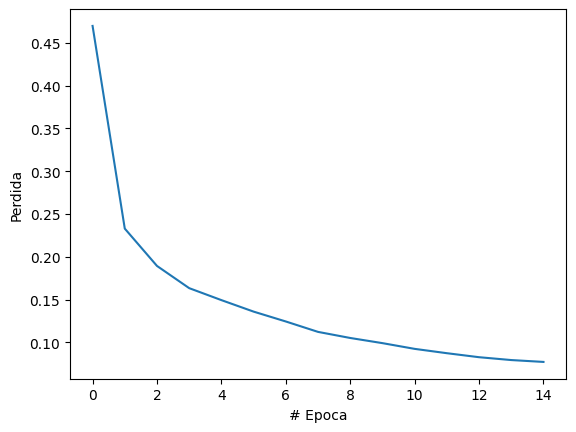

In [3]:
import matplotlib.pyplot as plt
from keras.callbacks import History

# Assuming you have a history object from a previous training session
plt.xlabel("# Epoca")
plt.ylabel("Perdida")
plt.plot(history.history["loss"])

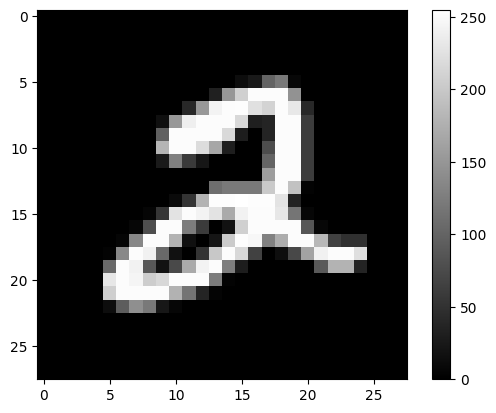

In [4]:
import matplotlib.pyplot as plt
image = x_train[5].reshape((28, 28))
plt.figure()
plt.imshow(image, cmap="gray")#número de imagen en el mnist
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
score = exp2.evaluate(x_testv, y_testc, verbose=1) #evaluar la eficiencia del modelo
print(score)
a=exp2.predict(x_testv) #predicción de la red entrenada
print(a.shape)
print(a[1])
print("resultado correcto:")
print(y_testc[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9682
[0.10013684630393982, 0.9682000279426575]
313/313 [==============================] - 0s 1ms/step
(10000, 10)
[1.4105323e-06 3.1013414e-04 9.9963659e-01 3.9520462e-05 1.6957860e-10
 1.1377421e-05 6.2174826e-07 5.9435847e-09 2.4353818e-07 3.0055414e-10]
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
